---

# <center>★ AI / ML Project - LR Optimization★

---

<center><img src="lro.png" style="width: 800px;"/>

---

### Description:

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

The learning rate may be the most important hyperparameter when configuring your neural network. Therefore it is vital to know how to investigate the effects of the learning rate on model performance and to build an intuition about the dynamics of the learning rate on model behavior.


### Acknowledgement: 
udemy, coursera, machinelearningmastery

### Objective:
- Finding the optimal learning rate for training in a Deep Neural Network.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Predictive Modelling
4. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [2]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import tensorflow as tf
from sklearn.datasets import make_circles

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [7]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


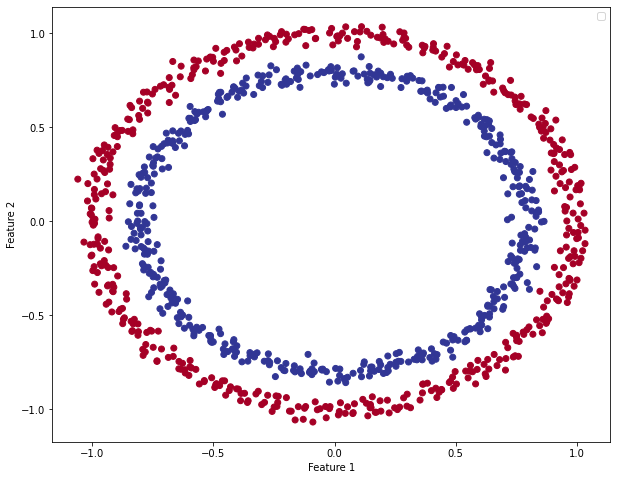

In [39]:
# Visualising the data distribution

plt.figure(figsize=[10,8])
# plt.scatter(circles[circles.label==0]['X0'],circles[circles.label==0]['X1'], label='Class 0')
# plt.scatter(circles[circles.label==1]['X0'],circles[circles.label==0]['X1'], label='Class 1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

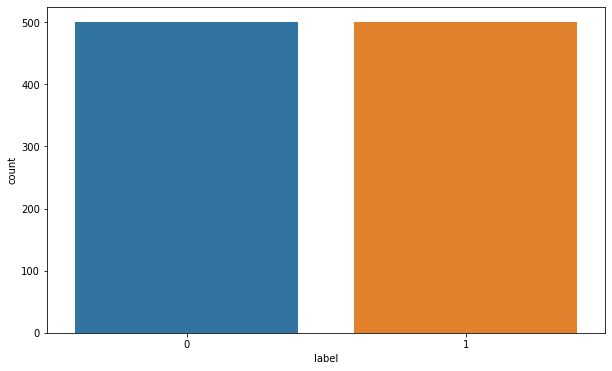

In [40]:
#Checking the Label Distribution

# plt.figure(figsize=[6,4])
sns.countplot(circles.label)
plt.show()

---

# <center>2. Data Preprocessing

In [17]:
# How many examples are in the whole dataset?
len(X)

1000

In [18]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [47]:
#Defining a custom function to plot the decision boundary learned by the model

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

---

# <center>3. Predictive Modelling

In [45]:
#Creating a simple DL Model Architecture & Training with default learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model using functional API
input = tf.keras.layers.Input(shape=(2,))
hidden_1 = tf.keras.layers.Dense(4, activation='relu')(input)
hidden_2 = tf.keras.layers.Dense(4, activation='relu')(hidden_1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_2) # output layer, using 'sigmoid' for the output

model_1 = tf.keras.Model(inputs=input, outputs=output) # Creating model by specifying the input & output layers

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),  # default learning rate
                metrics=['accuracy'])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5138
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5175
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5200
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5300
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5350
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5400
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5425
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5387
Epoch 11/25
25/25 [

doing binary classifcation...
doing binary classifcation...


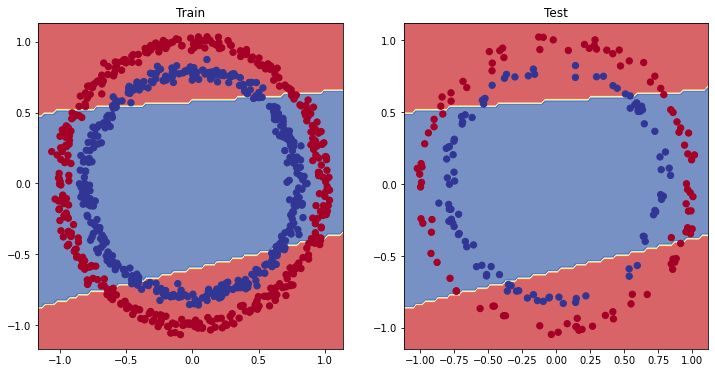

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_8 training curves')

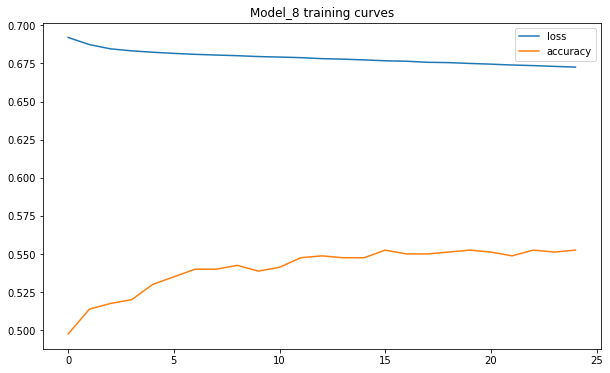

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")

**Inference:** 

As we can observe that using the default Learning Rate is not always a good choice, as it can often lead to long training time to converge, or it may even lead to learning a sub-optimal set of weights too fast or an unstable training process. Hence we shall try to mitigate this problem by finding the optimal rate by tuning it.

---

# <center>4. Tuning Learning-Rate

In [49]:
#Creating a simple DL Model Architecture & Training with default learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model using functional API
input = tf.keras.layers.Input(shape=(2,))
hidden_1 = tf.keras.layers.Dense(4, activation='relu')(input)
hidden_2 = tf.keras.layers.Dense(4, activation='relu')(hidden_1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_2) # output layer, using 'sigmoid' for the output

model_2 = tf.keras.Model(inputs=input, outputs=output) # Creating model by specifying the input & output layers

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),  # default learning rate
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_2.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1537 - accuracy: 0.9463 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9250 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.8775 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8800 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1661 - accuracy: 0.9388 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.8425 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8625 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9075 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.8

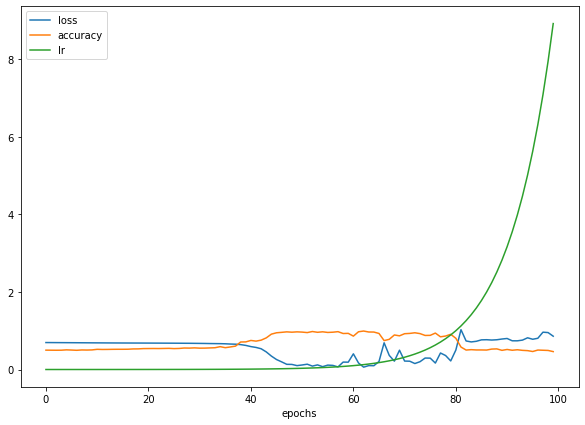

In [50]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

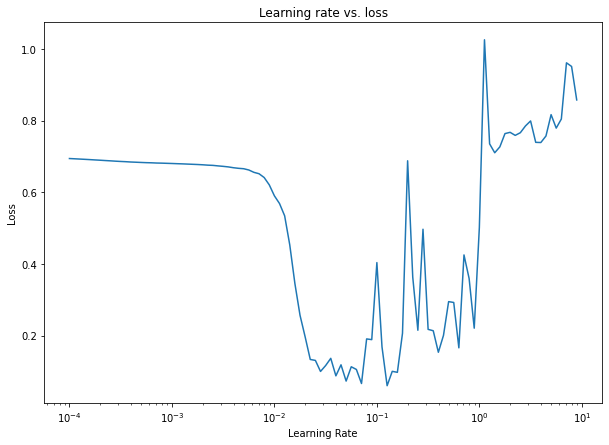

In [51]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

**Inference:** 

The optimal learning rate can be determined in the order of 1e-1 of the least point in the graph. In a simpler approach, we can see choose the value where a steep slope disconnets. In our case it is one unit more than 10^-2. Hence we shall finalize on the learning rate equal to 0.02.

In [63]:
# Rebuilding the model with optimal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create the model using functional API
input_3 = tf.keras.layers.Input(shape=(2,))
hidden_3 = tf.keras.layers.Dense(4, activation='relu')(input_3)
hidden_4 = tf.keras.layers.Dense(4, activation='relu')(hidden_3)
output_3 = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_4)

model_3 = tf.keras.Model(inputs=input_3, outputs=output_3) # Creating model by specifying the input & output layers

# Compile the model with the ideal learning rate
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the optimal learning rate
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

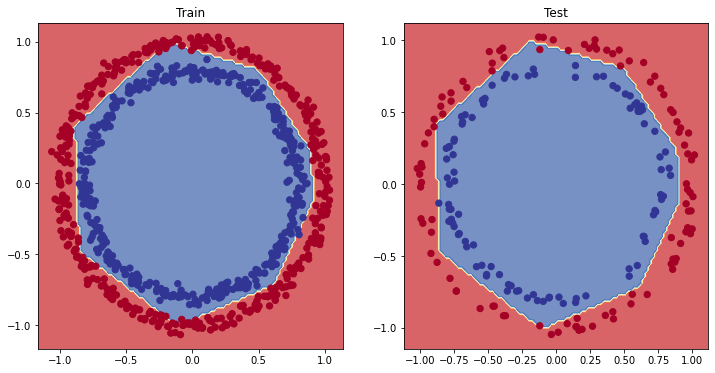

In [58]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X=X_test, y=y_test)
plt.show()

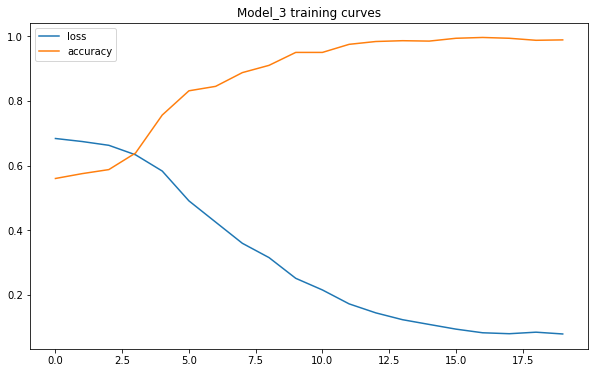

In [60]:
# Plot the loss curves

pd.DataFrame(history.history).plot()

plt.title("Model_3 training curves")
plt.show()

**Inference:** 

Using the optimal learning rate resulted in better model with faster convergence, while also making sure it did not result in learning a sub-optimal set of weights too fast or an unstable training process.

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The custom dataset had 1k samples out which 800 were used for training & 200 were used for testing purpose.
- Visualising the samples & it's distribution, helped us to get some insights into the dataset.
- The Vanilla Neural Network Architecture with default learning rate for Adam Optimizer did not perform so well, given the low complexity of data, it took too long to converge.
- Hence finding the optimal learning rate by tuning it, helped to us to build better model with optimal training time.
- Further improvisations can include the usage of cmplex layers like CNN, adding dropouts & batch-normalization layers, or even utilizing the Transfer Learning Methodology to train Prominent Models like VGG, ResNet, AlexNet, GoogleNet, Etc.

In [1]:
#<<<--------------------------------------THE END---------------------------------------->>>